# Approche Deep Learning

Nous proposons une approche élégante en utilisant les réseaux de neurones convolutionnels directements appliqués aux images issues des plot des landmarks.
Cette approche élégante sera conduite de manière la plus optimisée possible.

Il y a aura  deux types d'images :
- les plot avec des points noirs
- les plot avec les points colorés délimitant les différentes zones du visage (annotation manuelle des images)

Ce notebook comprendra une approche directe (pas d'augmentation, pas/peu d'optimisation d'hyperparametres) et un approche avancée (data augmentation, architecture optimisée) et si le temps le permet du fine tuning ou transfert learning vers d'autres backbones plus avancés.

## Librairies

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from scikeras.wrappers import KerasClassifier

### Data generation and preprocessing

In [14]:
# Data Preparation and augmentation
train_datagen_augmented =         ImageDataGenerator(rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        rotation_range=15,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1)

test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator_augmented =       train_datagen_augmented.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 302 images belonging to 6 classes.
Found 15 images belonging to 6 classes.


In [15]:
# Data Preparation NO AUGMENTATION
train_datagen =         ImageDataGenerator(rescale=1./255)
test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator =       train_datagen.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 302 images belonging to 6 classes.
Found 15 images belonging to 6 classes.


### Building / Compiling / Fitting model

In [16]:
# Model Building
model =     Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

### Fitting model

In [17]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
10/10 [==============================] - 9s 654ms/step - loss: 1.8309 - accuracy: 0.1821 - val_loss: 1.7507 - val_accuracy: 0.2667
Epoch 2/30
10/10 [==============================] - 7s 672ms/step - loss: 1.7556 - accuracy: 0.2483 - val_loss: 1.7520 - val_accuracy: 0.2667
Epoch 3/30
10/10 [==============================] - 7s 655ms/step - loss: 1.7321 - accuracy: 0.2848 - val_loss: 1.7111 - val_accuracy: 0.2667
Epoch 4/30
10/10 [==============================] - 6s 607ms/step - loss: 1.6881 - accuracy: 0.3179 - val_loss: 1.5816 - val_accuracy: 0.4000
Epoch 5/30
10/10 [==============================] - 7s 685ms/step - loss: 1.3511 - accuracy: 0.5033 - val_loss: 0.9659 - val_accuracy: 0.6667
Epoch 6/30
10/10 [==============================] - 6s 633ms/step - loss: 0.9466 - accuracy: 0.6291 - val_loss: 0.7289 - val_accuracy: 0.8000
Epoch 7/30
10/10 [==============================] - 6s 594ms/step - loss: 0.7086 - accuracy: 0.7649 - val_loss: 0.6254 - val_accuracy: 0.8000
Epoch 

In [18]:
# model.save('emotion_classifier_model.h5')  

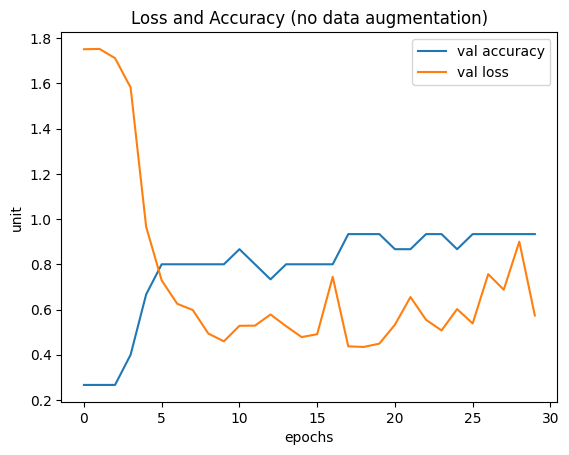

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss and Accuracy (no data augmentation)')
plt.legend()

In [20]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        train_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

evaluation =            model.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 15 images belonging to 6 classes.


1/1 [==============================] - 0s 230ms/step - loss: 0.6274 - accuracy: 0.8000
Test Loss: 0.6273911595344543
Test Accuracy: 0.800000011920929
